# 커피 지수
#### (스타벅스 + 커피빈) / (이디야 + 빽다방)

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm_notebook
from glob import glob 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [13]:
draw_korea = pd.read_csv('./static/data/draw_korea.csv')
cafe_result = pd.read_csv('./static/upload/커피지수.csv')

In [14]:
BORDER_LINES = [
        [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
        [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
        (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
        [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
        (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기
        [(8,10), (8,11), (6,11), (6,12)], # 강원
        [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충북
        [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
        (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전북
        [(13,5), (13,6), (16,6)], # 대전
        [(13,5), (14,5)], #세종
        [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
        [(20,5), (21,5), (21,6), (23,6)], #전남
        [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충남
        [(14,9), (14,11), (14,12), (13,12), (13,13)], #경북
        [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
        [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
        [(16,11), (16,13)], #울산
        [(27,5), (27,6), (25,6)],
    ]

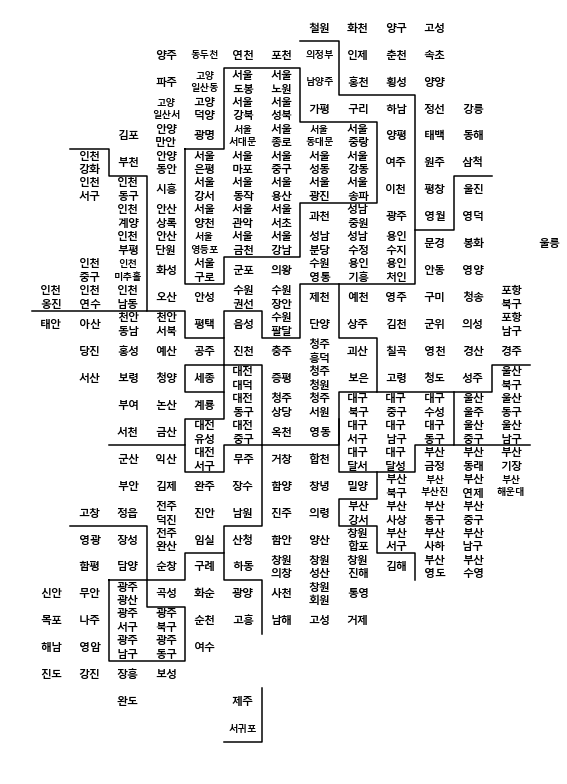

In [15]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5,row['y']+0.5), weight='bold',
            fontsize=fontsize, ha='center', va='center',
            linespacing=linespacing)
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs,ys,c='black', lw=1.5)
    plt.gca().invert_yaxis()

    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

#### 커피지수

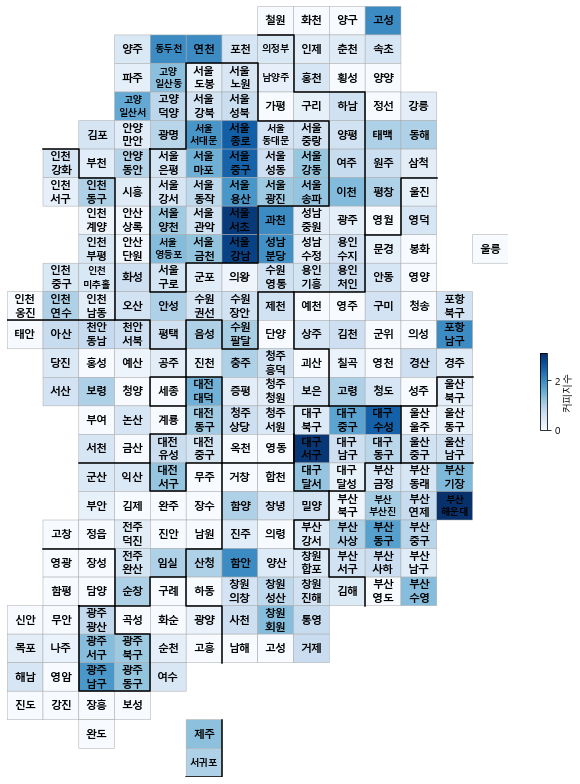

In [17]:
drawKorea('커피지수', cafe_result, 'Blues')

In [18]:
# 커피지수 Top 5
cafe_result.sort_values(by='커피지수', ascending=False).head()

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
139,부산 해운대,17,12,29.0,5.0,9.0,2.0,3.090909
116,대구 서구,15,8,3.0,0.0,1.0,0.0,3.000000
154,서울 서초,7,6,49.0,31.0,20.0,7.0,2.962963
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
162,서울 종로,4,6,33.0,15.0,14.0,5.0,2.526316


#### 스타벅스 매장 수

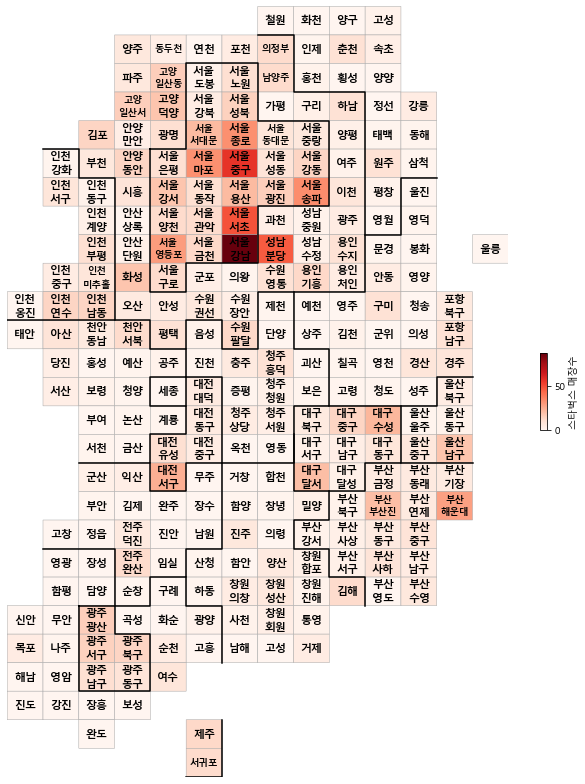

In [19]:
drawKorea('스타벅스 매장수', cafe_result, 'Reds')

In [20]:
# 스타벅스 매장 수 Top 5
cafe_result.sort_values(by='스타벅스 매장수', ascending=False).head()

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
163,서울 중구,5,6,57.0,15.0,22.0,7.0,2.482759
154,서울 서초,7,6,49.0,31.0,20.0,7.0,2.962963
34,성남 분당,8,7,47.0,17.0,21.0,12.0,1.939394
157,서울 송파,6,8,34.0,13.0,28.0,10.0,1.236842


#### 커피빈 매장 수

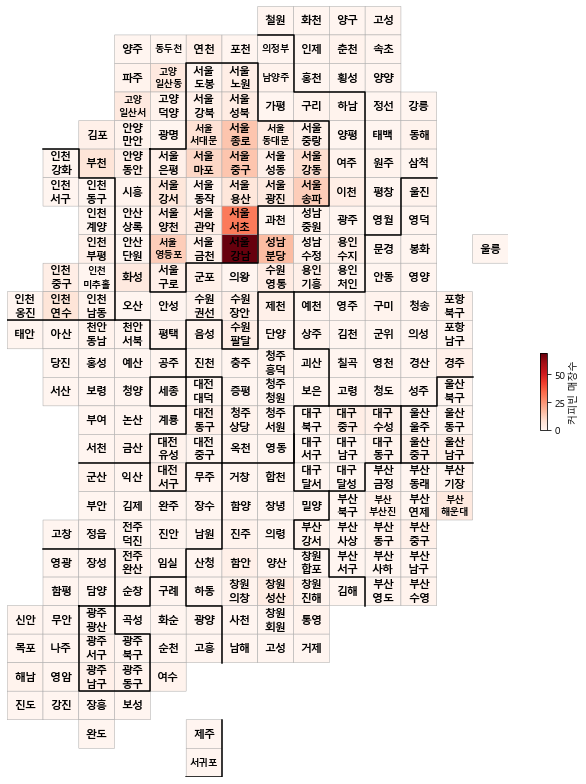

In [21]:
drawKorea('커피빈 매장수', cafe_result, 'Reds')

In [22]:
# 커피빈 매장 수 Top 5
cafe_result.sort_values(by='커피빈 매장수', ascending=False).head()

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
154,서울 서초,7,6,49.0,31.0,20.0,7.0,2.962963
34,성남 분당,8,7,47.0,17.0,21.0,12.0,1.939394
163,서울 중구,5,6,57.0,15.0,22.0,7.0,2.482759
162,서울 종로,4,6,33.0,15.0,14.0,5.0,2.526316


#### 이디야 매장 수

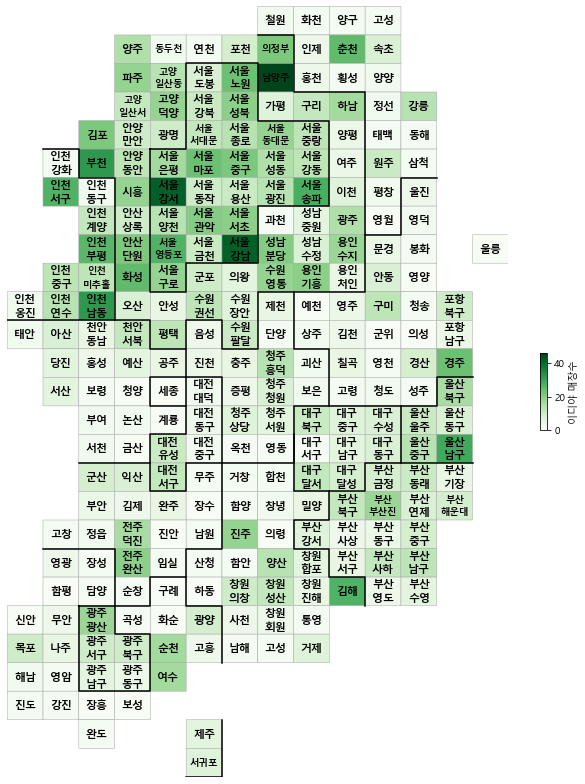

In [23]:
drawKorea('이디야 매장수', cafe_result, 'Greens')

In [24]:
# 이디야 매장 수 Top 5
cafe_result.sort_values(by='이디야 매장수', ascending=False).head()

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
27,남양주,2,7,12.0,1.0,46.0,3.0,0.265306
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
143,서울 강서,6,4,19.0,6.0,42.0,8.0,0.500000
173,인천 남동,10,2,14.0,1.0,32.0,13.0,0.333333
33,부천,5,2,7.0,7.0,32.0,9.0,0.341463


#### 빽다방 매장 수

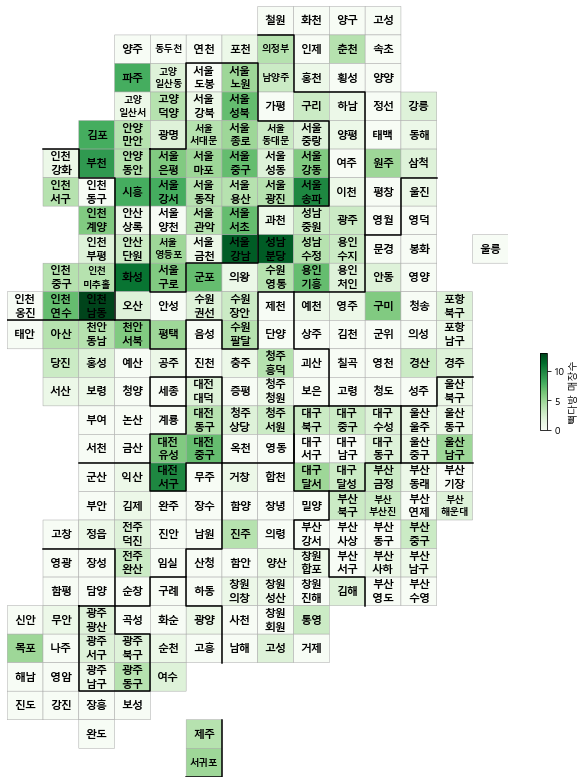

In [25]:
drawKorea('빽다방 매장수', cafe_result, 'Greens')

In [26]:
# 빽다방 매장 수 Top 5
cafe_result.sort_values(by='빽다방 매장수', ascending=False).head()

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
173,인천 남동,10,2,14.0,1.0,32.0,13.0,0.333333
34,성남 분당,8,7,47.0,17.0,21.0,12.0,1.939394
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
59,화성,9,3,19.0,5.0,25.0,11.0,0.666667
121,대전 서구,16,4,25.0,2.0,12.0,10.0,1.227273


In [27]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')

In [28]:
coffee_res = cafe_result.set_index('ID')

In [31]:
geo_path = './static/data/skorea_municipalities_geo_korea.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = coffee_res['커피지수'],
               columns = [coffee_res.index, coffee_res['커피지수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:16px"><b>전국 커피지수</b></h3>'  
map.get_root().html.add_child(folium.Element(title_html))

map

In [35]:
cafe_result.sort_values(by='커피지수', ascending=False).head().reset_index(drop=True)

,ID,y,x,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
139,부산 해운대,17,12,29.0,5.0,9.0,2.0,3.090909
116,대구 서구,15,8,3.0,0.0,1.0,0.0,3.000000
154,서울 서초,7,6,49.0,31.0,20.0,7.0,2.962963
140,서울 강남,8,6,87.0,69.0,42.0,12.0,2.888889
162,서울 종로,4,6,33.0,15.0,14.0,5.0,2.526316
